<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0__2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20-2.csv',
 'data_multi_delta_0_n30-2.csv',
 'data_multi_delta_0_n60-2.csv',
 'data_multi_delta_0_n120-2.csv',
 'data_multi_delta_0_n250-2.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30-2.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.355606,42.156490,29.141952,0.781527,146.435574,145.001160,1.434414
1,0.0,1.0,37.365810,59.119179,66.584958,-2.466517,170.603430,172.661512,-2.058082
2,0.0,2.0,92.534224,41.556787,26.913367,-0.743278,170.261101,170.333032,-0.071932
3,0.0,3.0,80.791425,69.330371,94.786003,-0.910091,253.997708,254.637043,-0.639335
4,0.0,4.0,38.433987,63.363527,42.900654,0.434811,155.132980,154.296433,0.836547
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,89.147337,22.867679,46.857113,-1.357721,167.514409,167.767452,-0.253044
29996,999.0,26.0,74.129366,88.845130,68.889800,-0.576104,241.288193,241.782947,-0.494754
29997,999.0,27.0,88.919113,93.253896,28.390292,-1.963007,218.600294,220.320733,-1.720439
29998,999.0,28.0,69.868441,33.041984,28.078753,-1.001685,139.987493,139.993702,-0.006209


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.355606,42.156490,29.141952,0.781527,146.435574,145.001160,1.434414
1,0.0,1.0,37.365810,59.119179,66.584958,-2.466517,170.603430,172.661512,-2.058082
2,0.0,2.0,92.534224,41.556787,26.913367,-0.743278,170.261101,170.333032,-0.071932
3,0.0,3.0,80.791425,69.330371,94.786003,-0.910091,253.997708,254.637043,-0.639335
4,0.0,4.0,38.433987,63.363527,42.900654,0.434811,155.132980,154.296433,0.836547
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,89.147337,22.867679,46.857113,-1.357721,167.514409,167.767452,-0.253044
29996,999.0,26.0,74.129366,88.845130,68.889800,-0.576104,241.288193,241.782947,-0.494754
29997,999.0,27.0,88.919113,93.253896,28.390292,-1.963007,218.600294,220.320733,-1.720439
29998,999.0,28.0,69.868441,33.041984,28.078753,-1.001685,139.987493,139.993702,-0.006209


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    64.355606  42.156490  29.141952  ...  146.435574  145.001160  1.434414
      1.0    37.365810  59.119179  66.584958  ...  170.603430  172.661512 -2.058082
      2.0    92.534224  41.556787  26.913367  ...  170.261101  170.333032 -0.071932
      3.0    80.791425  69.330371  94.786003  ...  253.997708  254.637043 -0.639335
      4.0    38.433987  63.363527  42.900654  ...  155.132980  154.296433  0.836547
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   89.147337  22.867679  46.857113  ...  167.514409  167.767452 -0.253044
      26.0   74.129366  88.845130  68.889800  ...  241.288193  241.782947 -0.494754
      27.0   88.919113  93.253896  28.390292  ...  218.600294  220.320733 -1.720439
      28.0   69.868441  33.041984  28.078753  ...  139.987493  139.993702 -0.006209
      29.0   72.011193  33.584602  98.559039  ...  214.322347  213.469829  0.852518

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    64.355606  42.156490  29.141952  ...  146.435574  145.001160  1.434414
      1.0    37.365810  59.119179  66.584958  ...  170.603430  172.661512 -2.058082
      2.0    92.534224  41.556787  26.913367  ...  170.261101  170.333032 -0.071932
      3.0    80.791425  69.330371  94.786003  ...  253.997708  254.637043 -0.639335
      4.0    38.433987  63.363527  42.900654  ...  155.132980  154.296433  0.836547
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   89.147337  22.867679  46.857113  ...  167.514409  167.767452 -0.253044
      26.0   74.129366  88.845130  68.889800  ...  241.288193  241.782947 -0.494754
      27.0   88.919113  93.253896  28.390292  ...  218.600294  220.320733 -1.720439
      28.0   69.868441  33.041984  28.078753  ...  139.987493  139.993702 -0.006209
      29.0   72.011193  33.584602  98.559039  ...  214.322347  213.469829  0.852518

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.355606,42.156490,29.141952,0.781527,146.435574,145.001160,1.434414
1,0.0,1.0,37.365810,59.119179,66.584958,-2.466517,170.603430,172.661512,-2.058082
2,0.0,2.0,92.534224,41.556787,26.913367,-0.743278,170.261101,170.333032,-0.071932
3,0.0,3.0,80.791425,69.330371,94.786003,-0.910091,253.997708,254.637043,-0.639335
4,0.0,4.0,38.433987,63.363527,42.900654,0.434811,155.132980,154.296433,0.836547
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,89.147337,22.867679,46.857113,-1.357721,167.514409,167.767452,-0.253044
29996,999.0,26.0,74.129366,88.845130,68.889800,-0.576104,241.288193,241.782947,-0.494754
29997,999.0,27.0,88.919113,93.253896,28.390292,-1.963007,218.600294,220.320733,-1.720439
29998,999.0,28.0,69.868441,33.041984,28.078753,-1.001685,139.987493,139.993702,-0.006209


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    64.355606  42.156490  29.141952  ...  146.435574  145.001160  1.434414
      1.0    37.365810  59.119179  66.584958  ...  170.603430  172.661512 -2.058082
      2.0    92.534224  41.556787  26.913367  ...  170.261101  170.333032 -0.071932
      3.0    80.791425  69.330371  94.786003  ...  253.997708  254.637043 -0.639335
      4.0    38.433987  63.363527  42.900654  ...  155.132980  154.296433  0.836547
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   89.147337  22.867679  46.857113  ...  167.514409  167.767452 -0.253044
      26.0   74.129366  88.845130  68.889800  ...  241.288193  241.782947 -0.494754
      27.0   88.919113  93.253896  28.390292  ...  218.600294  220.320733 -1.720439
      28.0   69.868441  33.041984  28.078753  ...  139.987493  139.993702 -0.006209
      29.0   72.011193  33.584602  98.559039  ...  214.322347  213.469829  0.852518

[30000 rows x 7 columns]

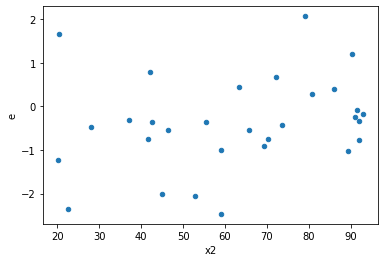

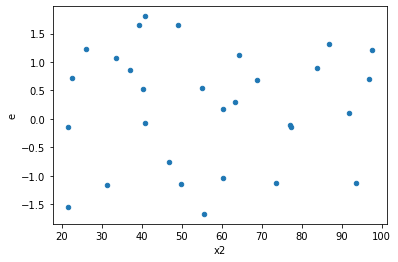

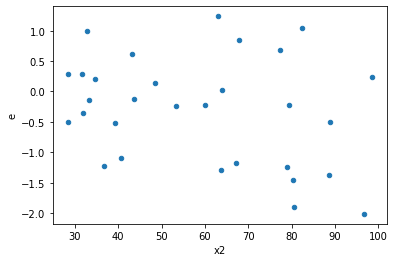

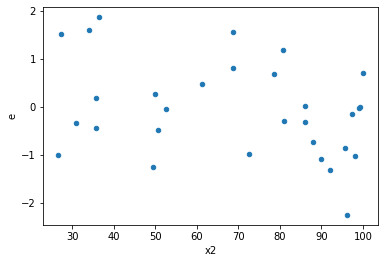

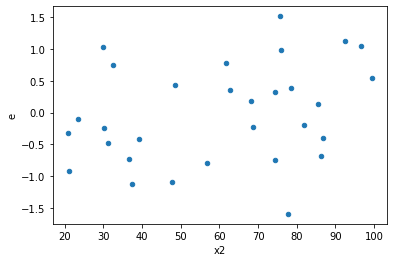

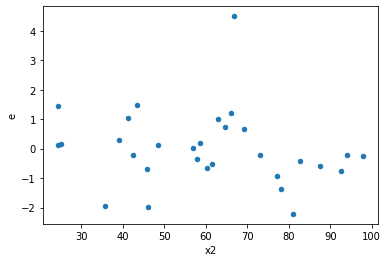

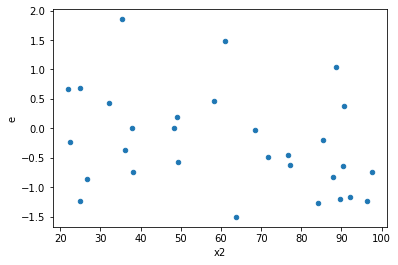

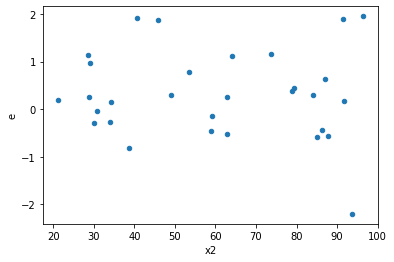

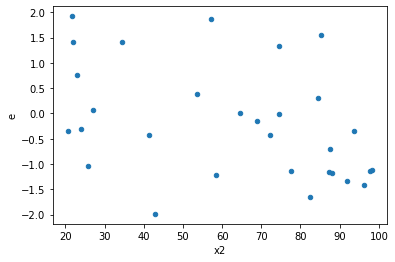

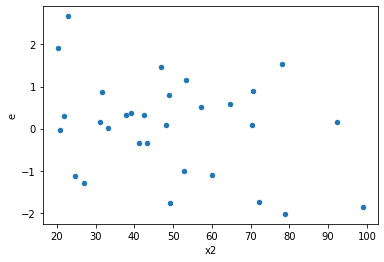

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,6.10015208995396,6.287612027751533,0.6777946766615511,0.6986235586390592,1.0307303711503015,0.9647773873865066,0.5176113063067467,0.4823886936932533,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,4.143079393546605,12.342443427860495,0.4603421548385117,1.3713826030956104,2.979050666295578,0.11955979553098217,0.9402201022345089,0.059779897765491086,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,5.038606858149242,6.224117717459409,0.5598452064610269,0.6915686352732676,1.235285445498247,0.7580749636265196,0.6209625181867402,0.3790374818132598,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,5.764084756449879,13.738013632231386,0.6404538618277643,1.5264459591368207,2.383381614376656,0.21180937038465508,0.8940953148076725,0.10590468519232754,Reject001=1 : Homoscedasticity
9.0,9.0,9.0,8.285609003133997,15.800155885896094,0.9206232225704442,1.7555728762106773,1.9069395961020792,0.35029342977416933,0.8248532851129153,0.17514671488708466,Reject001=1 : Homoscedasticity
13.0,9.0,9.0,4.084914962756005,6.213704876123939,0.4538794403062228,0.6904116529026598,1.5211344502338633,0.541977271435842,0.729011364282079,0.270988635717921,Reject001=1 : Homoscedasticity
14.0,9.0,9.0,9.737939496848888,12.041161315592072,1.0819932774276542,1.3379068128435636,1.236520448652252,0.75696885225277,0.621515573873615,0.378484426126385,Reject001=1 : Homoscedasticity
16.0,9.0,9.0,3.0853539636674805,7.082464317558636,0.3428171070741645,0.7869404797287374,2.2955111150812315,0.23167740574774198,0.884161297126129,0.11583870287387099,Reject001=1 : Homoscedasticity
17.0,9.0,9.0,2.7091759934436124,5.289010176742322,0.30101955482706805,0.5876677974158135,1.952257878241237,0.33333211213844294,0.8333339439307785,0.16666605606922147,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,6.10015208995396,6.287612027751533,0.6777946766615511,0.6986235586390592,1.0307303711503015,0.9647773873865066,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,9.610401465585202,5.629104086208729,1.0678223850650224,0.6254560095787477,0.5857303783162985,0.4377715001822747,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,4.143079393546605,12.342443427860495,0.4603421548385117,1.3713826030956104,2.979050666295578,0.11955979553098217,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,7.32475667217926,4.06251504947401,0.8138618524643622,0.4513905610526678,0.5546279871526888,0.39305879659798093,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,5.038606858149242,6.224117717459409,0.5598452064610269,0.6915686352732676,1.235285445498247,0.7580749636265196,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,12.896425676962084,12.87882583397073,1.4329361863291203,1.43098064821897,0.9986352929538613,0.9984102541726304,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,7.41637924429704,5.020611144640396,0.8240421382552268,0.5578456827378218,0.6769625688304823,0.5703939480320062,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,5.764084756449879,13.738013632231386,0.6404538618277643,1.5264459591368207,2.383381614376656,0.21180937038465508,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,11.548697490537824,7.148308545261378,1.2831886100597583,0.794256505029042,0.6189709749621712,0.4860177497915873,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      987
Reject001=0 : Heteroscedasticity     13
Name: Result_test, dtype: int64